<a href="https://colab.research.google.com/github/Rosalesmariana/Simulacion-I-/blob/main/Metodo_de_Composicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Composición**

Para este método vamos a utilizar como ejemplo una distribuciion de tipo triangular donde $a=2$, $b=5$, $c=8$

Como primer paso para iniciar nuestro codigo, importamos las librerias necesarias

In [5]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

Creamos una función en donde detallaremos cada linea para poder implementar el metodo de composición

In [6]:
# Función para simular el método de composición
def comp(n=1000, a=2, b=5, c=8): #como argumento toma el numero de muestras, el valor de a,b y c
    lista = []
    A1 = (b-a)/(c-a) #Calcula el area 1
    A2 = (c-b)/(c-a)  #Calcula el area 2

    for i in range(n):#Generamos 2 numeros aleatorios
        R1 = rnd.random() #R1 decide entre f1 o f2
        R2 = rnd.random() #R2 genera X
        if 0 <= R1 <= A1: #Como R1 decide entre f1 y f2 usamos una condicional
            x = a + (b-a) * np.sqrt(R2) #f1
        else:
            x = c + (c-b) * np.sqrt(R2) #f2
        lista.append(x)
    return np.array(lista)

# Generaramos las muestras
muestras = comp(1000)

Ahora para calcular la funcion de distribucion acumulativa creamos la siguiente función

In [7]:
#Funcion de distribucion acumulativa
def fdc(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Generar datos para la función de distribucion acumulativa
x_fdc, y_fdc = fdc(muestras)

Para nuestra funcion de densidad de probabilidad, la definimos de acuerdo a nuestro catalogo de funciones de probabilidad

In [8]:
# Definir la funcion de densidad de probabilidad
def fdp(x, a=2, b=5, c=8):
    A1 = (b-a)/(c-a)
    A2 = (c-b)/(c-a)
    if a <= x <= b:
        return (2 * (x - a) / ((b - a) * (c - a)))
    elif b < x <= c:
        return (2 * (c - x) / ((c - b) * (c - a)))
    else:
        return 0

# Generar datos para la funcion de densidad de probabilidad
x_fdp = np.linspace(1, 9, 400)
y_fdp = [fdp(x) for x in x_fdp]

Finalmente graficamos nuestra función de distribución acumulada, la función de densidad de probabilidad y el histograma de las muestras

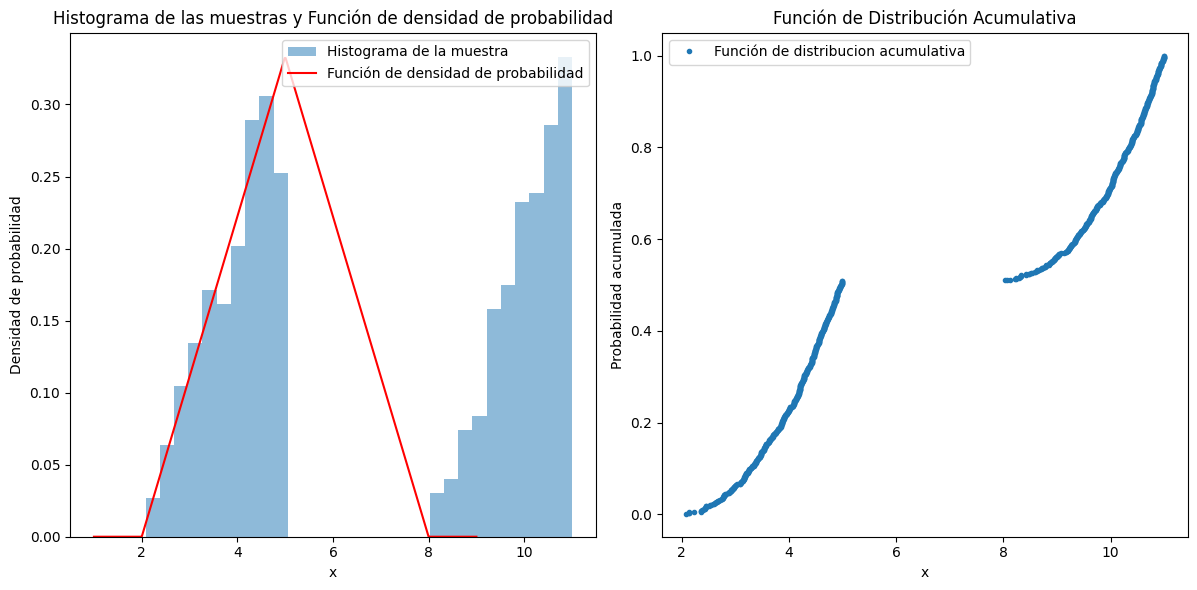

In [9]:

# Graficar el histograma de las muestras, la funcion de densidad y la acumulada
plt.figure(figsize=(18, 6))

#Grafica del Histograma de las muestras y la funcion de densidad
plt.subplot(1, 3, 1)
plt.hist(muestras, bins=30, density=True, alpha=0.5, label='Histograma de la muestra')
plt.plot(x_fdp, y_fdp, 'r-', label='Función de densidad de probabilidad')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.title('Histograma de las muestras y Función de densidad de probabilidad')

# Gráfica para la función de distribución acumulativa
plt.subplot(1, 3, 2)
plt.plot(x_fdc, y_fdc, marker='.', linestyle='none', label='Función de distribucion acumulativa')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.title('Función de Distribución Acumulativa')

plt.tight_layout()
plt.show()
